In [4]:
# Google Cloud things

project_id = 'cs229-project-258114'
bucket_name = 'goodreads_reviews'

from google.colab import auth
auth.authenticate_user()

!gcloud config set project {project_id}

# Download the file from a given Google Cloud Storage bucket.
!gsutil cp gs://{bucket_name}/finalbooks.csv /tmp/finalbooks.csv
!gsutil cp gs://{bucket_name}/finalratings.csv /tmp/finalratings.csv 
!gsutil cp gs://{bucket_name}/wordcloud.csv /tmp/wordcloud.csv 
## !gsutil cp gs://{bucket_name}/Popularity/goodreads-best-books.zip /tmp/best.zip


import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



Updated property [core/project].
Copying gs://goodreads_reviews/finalbooks.csv...
\ [1 files][  8.8 MiB/  8.8 MiB]                                                
Operation completed over 1 objects/8.8 MiB.                                      
Copying gs://goodreads_reviews/finalratings.csv...
\ [1 files][ 23.2 MiB/ 23.2 MiB]                                                
Operation completed over 1 objects/23.2 MiB.                                     
Copying gs://goodreads_reviews/wordcloud.csv...
/ [1 files][396.8 KiB/396.8 KiB]                                                
Operation completed over 1 objects/396.8 KiB.                                    


In [0]:
import zipfile
with zipfile.ZipFile('../tmp/best.zip', 'r') as zip_ref:
    zip_ref.extractall('../tmp/')


In [0]:
## ratings['book_id'].value_counts().head(45)
## out = ratings.groupby(by= 'book_id', as_index=False).agg({'rating':pd.Series.count})
## outid = out.loc[out.rating >= 7500]['book_id'].tolist()
## testbooks = finalbooks[~finalbooks["book_id"].isin(outid)]
## testratings = ratings[~ratings["book_id"].isin(outid)]

In [0]:
## STEP 1 WAS CLEANING THE DATA (ADDING TAG CLOUD FROM GOODREADS TAGS (TOP 4 TAGS))
## RESULTS HERE: Books with metadata (book id, genre, tag cloud, author, year of publication, title, global rating) & Individual ratings from Users

finalbooks = pd.read_csv('../tmp/finalbooks.csv')
ratings = pd.read_csv('../tmp/finalratings.csv')

## finalbooks['genre'] = finalbooks['genre'].fillna('Unknown')
## finalbooks['firstgenre']= [x.split('|')[0] for x in finalbooks['genre']]


In [0]:
useronly=ratings.groupby(by= 'user_id', as_index=False).agg({'rating':pd.Series.count}).sort_values('rating',ascending = False).head(15000)

In [0]:
finalratings = ratings[ratings.user_id.isin(useronly.user_id)]
bookonly = finalratings.groupby(by= 'book_id', as_index=False).agg({'rating':pd.Series.count}).sort_values('rating',ascending = False).head(8000)
finalratings = finalratings[ratings.book_id.isin(bookonly.book_id)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
finalbooks = finalbooks[finalbooks.book_id.isin(bookonly.book_id)]
finalbooks = finalbooks.reset_index(drop=True)
finalbooks["newbookid"] = finalbooks.index + 1
finalbooks

,book_id,goodreads_book_id,isbn,isbn13,first_author,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_cloud,mosttagged,snippet,pages,genre,firstgenre,newbookid
0,1,2767052,439023483,9.780439e+12,Suzanne Collins,Suzanne Collins,2008.0,The Hunger Games,The Hunger Games,eng,4.34,4780653,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,youngadult-fiction-dystopian-sciencefiction,youngadult,Winning will make you famous. Losing means cer...,374 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...,Young Adult,1
1,2,3,439554934,9.780440e+12,J.K. Rowling,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone,eng,4.44,4602479,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,fantasy-youngadult-fiction,fantasy,Harry Potter's life is miserable. His parents ...,320 pages,Fantasy|Young Adult|Fiction,Fantasy,2
2,3,41865,316015849,9.780316e+12,Stephenie Meyer,Stephenie Meyer,2005.0,Twilight,Twilight,en-US,3.57,3866839,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,youngadult-fantasy-vampires,youngadult,About three things I was absolutely positive.F...,498 pages,Young Adult|Fantasy|Romance|Paranormal|Vampire...,Young Adult,3
3,4,2657,61120081,9.780061e+12,Harper Lee,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,classics-fiction-litterature-history,classics,The unforgettable novel of a childhood in a sl...,324 pages,Classics|Fiction|Historical|Historical Fiction...,Classics,4
4,5,4671,743273567,9.780743e+12,F. Scott Fitzgerald,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,classics-fiction-litterature,classics,Alternate Cover Edition ISBN: 0743273567 (ISBN...,180 pages,Classics|Fiction|Academic|School|Literature|Hi...,Classics,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9985,19688,425176932,9.780425e+12,Steve Perry,"Steve Perry, Tom Clancy, Steve Pieczenik",2000.0,Tom Clancy's Net Force: Breaking Point,Breaking Point,eng,3.69,7693,268,684,2349,2456,2068,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,fiction-thriller-action,fiction,The second installment in Kristen Simmons's fa...,400 pages,Unknown,Unknown,7996
7996,9990,294081,140143912,9.780140e+12,Oscar Hijuelos,Oscar Hijuelos,1989.0,The Mambo Kings Play Songs of Love,The Mambo Kings Play Songs of Love,eng,3.68,9107,374,836,2692,3513,2361,https://images.gr-assets.com/books/1330072994m...,https://images.gr-assets.com/books/1330072994s...,fiction,fiction,"A Pulitzer Prize winning, bestselling sensatio...",407 pages,Fiction|Music,Fiction,7997
7997,9995,15613,1416523723,9.781417e+12,Herman Melville,Herman Melville,1924.0,"Billy Budd, Sailor","Billy Budd, Sailor",eng,3.09,10866,1478,2225,3805,2985,1617,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,classics-fiction-litterature,classics,A handsome young sailor is unjustly accused of...,160 pages,Classics|Fiction|Literature|Historical|Histori...,Classics,7998
7998,9996,7130616,441019455,9.780441e+12,Ilona Andrews,Ilona Andrews,2010.0,Bayou Moon,Bayou Moon,eng,4.09,17204,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...,urban-fantas

In [0]:
finalratings = finalratings.merge(finalbooks[['book_id','newbookid']], how='left', on= ['book_id'])
finalratings

,user_id,book_id,rating,newbookid
0,4,70,4,70
1,4,264,3,264
2,4,388,4,388
3,4,18,5,18
4,4,27,5,27
...,...,...,...,...
2112683,49925,510,5,510
2112684,49925,528,4,528
2112685,49925,722,4,722
2112686,49925,949,5,949


In [0]:
finalratings['newuser_id'] = finalratings.groupby('user_id').grouper.group_info[0]+1
finalratings

,user_id,book_id,rating,newbookid,newuser_id
0,4,70,4,70,1
1,4,264,3,264,1
2,4,388,4,388,1
3,4,18,5,18,1
4,4,27,5,27,1
...,...,...,...,...,...
2112683,49925,510,5,510,14274
2112684,49925,528,4,528,14274
2112685,49925,722,4,722,14274
2112686,49925,949,5,949,14274


In [0]:
finalratings = finalratings.drop(['user_id','book_id'], axis=1)
finalbooks = finalbooks.drop(['book_id', 'goodreads_book_id'], axis=1)

In [0]:
ratings['good'] =[1 if x >= 4 else 0 for x in ratings['rating']]

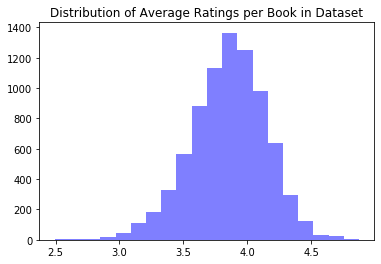

In [8]:
# Average Ratings for the books in the Data Base
agg = ratings.groupby(by= 'newbookid', as_index=False).agg({'rating':pd.Series.mean})
n, bins, patches = plt.hist(agg['rating'], 20, facecolor='blue', alpha=0.5)
plt.title('Distribution of Average Ratings per Book in Dataset')
plt.show()


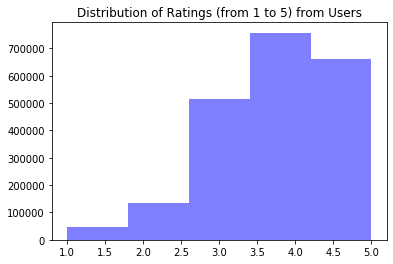

In [10]:
# Distribution of the individual ratings given by our User Base

n, bins, patches = plt.hist(ratings['rating'], 5, facecolor='blue', alpha=0.5)
plt.title('Distribution of Ratings (from 1 to 5) from Users')
plt.show()


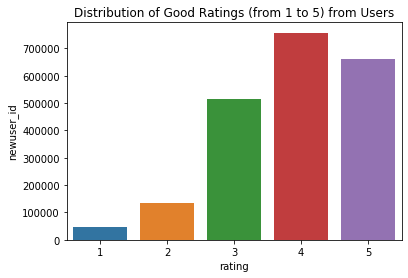

In [11]:
# Distribution of the individual ratings given by our User Base
distr = ratings.groupby(by= 'rating', as_index=False).agg({'newuser_id':pd.Series.count}) 
sns.barplot(x="rating" , y="newuser_id",  data=distr)
plt.title('Distribution of Good Ratings (from 1 to 5) from Users')
plt.show()

In [12]:
# Distribution of the # of Ratings per User

ratings['rating'].value_counts()
#testratings['user_id'].max()

4    757468
5    659929
3    515113
2    134803
1     45375
Name: rating, dtype: int64

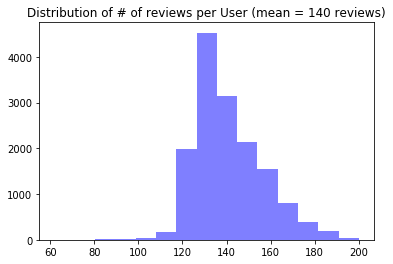

In [0]:
# Distribution of the # of Ratings per User

n, bins, patches = plt.hist(finalratings['newuser_id'].value_counts(), 15, facecolor='blue', alpha=0.5)
plt.title('Distribution of # of reviews per User (mean = 140 reviews)')
plt.show()

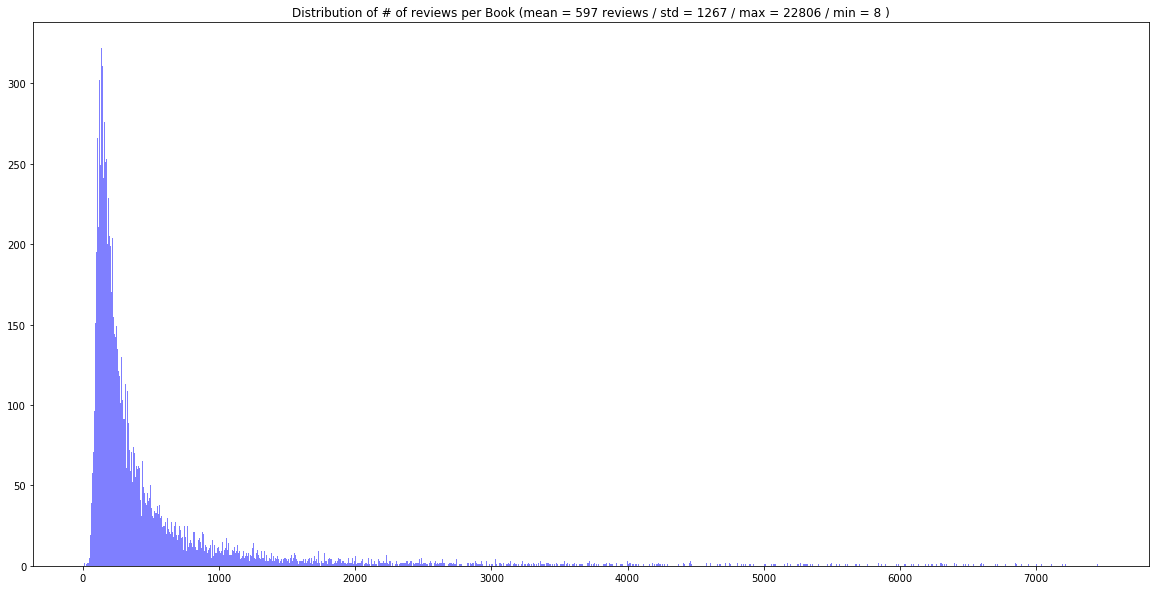

In [0]:
# Distribution of the # of Ratings per Book
facet, axes = plt.subplots(1, 1, figsize=(20, 10))
n, bins, patches = plt.hist(testratings['book_id'].value_counts(), 1000, facecolor='blue', alpha=0.5 )   #log= True
plt.title('Distribution of # of reviews per Book (mean = 597 reviews / std = 1267 / max = 22806 / min = 8 )')
plt.show()

In [0]:
##finalbooks.info()
finalbooks['genre'] = finalbooks['genre'].fillna('Unknown')
finalbooks['firstgenre']= [x.split('|')[0] for x in finalbooks['genre']]

In [0]:
testbooks['genre'] = testbooks['genre'].fillna('Unknown')
testbooks['firstgenre']= [x.split('|')[0] for x in testbooks['genre']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


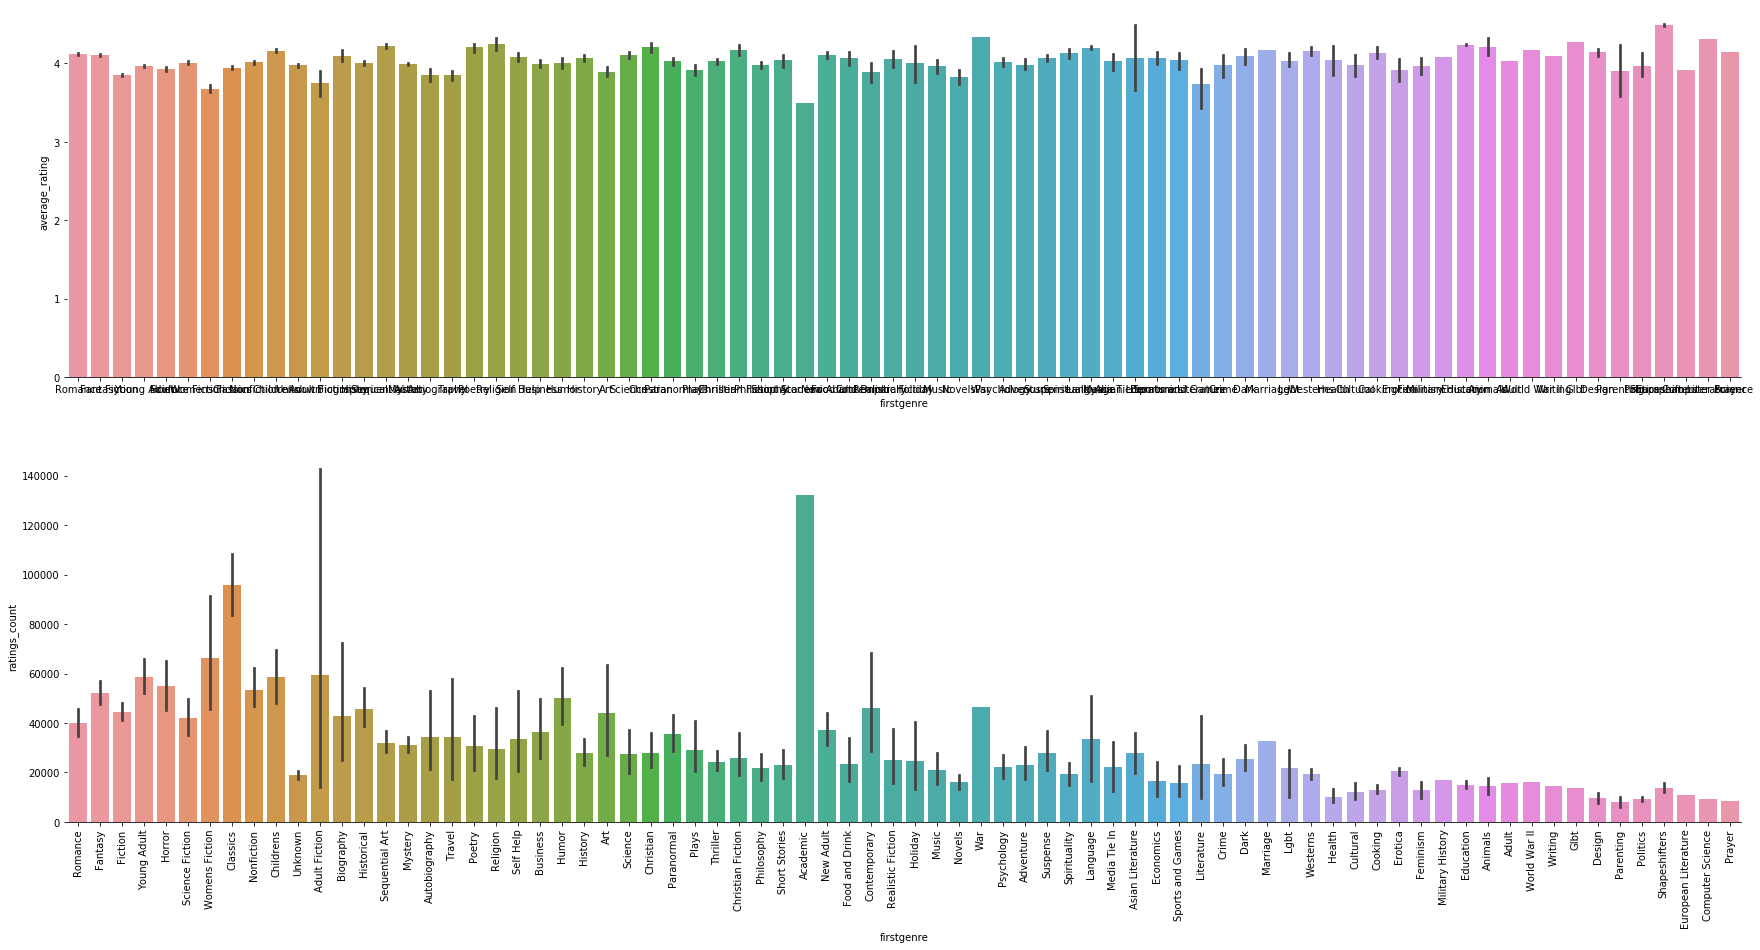

In [0]:
# Distribution of the # of Ratings per Book
facet, axes = plt.subplots(2, 1, figsize=(30, 15))
sns.despine(left=True)
sns.barplot(x="firstgenre", y="average_rating",  data=testbooks,  ax=axes[0])
plt.xticks(rotation=90)
sns.barplot(x="firstgenre", y="ratings_count",  data=testbooks,  ax=axes[1])
plt.xticks(rotation=90)

plt.show()

In [0]:
temp = data[['book_title','book_pages', 'book_desc', 'book_rating']]
## temp['book_isbn'] = temp['book_isbn'].apply(pd.to_numeric, errors='coerce')
finalbooks = books
finalbooks['title'] = finalbooks['title'].str.replace(r"\(.*\)","")
finalbooks['original_title'] = finalbooks['original_title'].str.replace(r"\(.*\)","")

In [0]:
## finalbooks[finalbooks.book_isbn.notnull()]

In [0]:
finalbooks = finalbooks.merge(temp.drop_duplicates(['book_title']), how='left', left_on= ['original_title'], right_on= ['book_title'])
finalbooks = finalbooks.merge(temp.drop_duplicates(['book_title']), how='left', left_on= ['title'], right_on= ['book_title'])
finalbooks.head(20)

,book_id,goodreads_book_id,isbn,isbn13,first_author,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_cloud,amazon_genre,mosttagged,book_title_x,book_pages_x,book_desc_x,book_rating_x,book_title_y,book_pages_y,book_desc_y,book_rating_y
0,1,2767052,439023483,9.780439e+12,Suzanne Collins,Suzanne Collins,2008.0,The Hunger Games,The Hunger Games,eng,4.34,4780653,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,youngadult-fiction-dystopian-sciencefiction,Young Adult|Fiction|Science Fiction|Dystopia|F...,youngadult,The Hunger Games,374 pages,Winning will make you famous. Losing means cer...,4.33,The Hunger Games,374 pages,Winning will make you famous. Losing means cer...,4.33
1,2,3,439554934,9.780440e+12,J.K. Rowling,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone,eng,4.44,4602479,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,fantasy-youngadult-fiction,Fantasy|Young Adult|Fiction,fantasy,NaN,NaN,NaN,NaN,Harry Potter and the Sorcerer's Stone,320 pages,Harry Potter's life is miserable. His parents ...,4.46
2,3,41865,316015849,9.780316e+12,Stephenie Meyer,Stephenie Meyer,2005.0,Twilight,Twilight,en-US,3.57,3866839,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,youngadult-fantasy-vampires,Young Adult|Fantasy|Romance|Paranormal|Vampire...,youngadult,Twilight,498 pages,About three things I was absolutely positive.F...,3.58,Twilight,498 pages,About three things I was absolutely positive.F...,3.58
3,4,2657,61120081,9.780061e+12,Harper Lee,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,classics-fiction-litterature-history,Classics|Fiction|Historical|Historical Fiction...,classics,To Kill a Mockingbird,324 pages,The unforgettable novel of a childhood in a sl...,4.27,To Kill a Mockingbird,324 pages,The unforgettable novel of a childhood in a sl...,4.27
4,5,4671,743273567,9.780743e+12,F. Scott Fitzgerald,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,classics-fiction-litterature,Classics|Fiction|Academic|School|Literature|Hi...,classics,The Great Gatsby,180 pages,Alternate Cover Edition ISBN: 0743273567 (ISBN...,3.90,The Great Gatsby,180 pages,Alternate Cover Edition ISBN: 0743273567 (ISBN...,3.90
5,6,11870085,525478817,9.780525e+12,John Green,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,eng,4.26,2346404,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...,youngadult-fiction-romance,Young Adult|Fiction|Romance|Contemporary,youngadult,The Fault in Our Stars,313 pages,Despite the tumor-shrinking medical miracle th...,4.24,The Fault in Our Stars,313 pages,Despite the tumor-shrinking medical miracle th...,4.24
6,7,5907,618260307,9.780618e+12,J.R.R. Tolkien,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,The Hobbit,en-US,4.25,2071616,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...,fantasy-classics-fiction-litterature,Fantasy|Classics|Fiction|Adventure|Young Adult...,fantasy,The Hobbit or There and Back Again,319 pages,"Smaug certainly looked fast asleep, when Bilbo...",4.26,The Hobbit,366 pages,In a hole in the ground there lived a hobbit. ...,4.26
7,8,5107,316769177,9.780317e+1

In [0]:
## finalbooks = finalbooks.dropna(how='any') 
finalbooks['genre'] = finalbooks['genre'].fillna('Unknown')
finalbooks['firstgenre']= [x.split('|')[0] for x in finalbooks['genre']]
finalbooks['pages'] = finalbooks['pages'].fillna('0')
finalbooks.info()


## finalbooks = finalbooks.dropna(how='any') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
book_id                      10000 non-null int64
goodreads_book_id            10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
first_author                 10000 non-null object
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               10000 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 non-null int64
ratings_3                    10000 non-null int64
ratings_4                    10000 non-null int64
ratings_5                    10000 non-null int64
image_url                    10000

In [0]:
finalbooks['snippet'] = finalbooks['book_desc_y'].fillna(finalbooks['book_desc_x'])
finalbooks['pages'] = finalbooks['book_pages_y'].fillna(finalbooks['book_pages_x'])
finalbooks = finalbooks.drop(['book_desc_x','book_desc_y','amazon_genre', 'book_pages_y', 'book_pages_x','book_rating_x','book_rating_y' , 'book_title_y', 'book_title_x'], axis=1)
finalbooks.head(20)

,book_id,goodreads_book_id,isbn,isbn13,first_author,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_cloud,mosttagged,snippet,pages,genre
0,1,2767052,439023483,9.780439e+12,Suzanne Collins,Suzanne Collins,2008.0,The Hunger Games,The Hunger Games,eng,4.34,4780653,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,youngadult-fiction-dystopian-sciencefiction,youngadult,Winning will make you famous. Losing means cer...,374 pages,Young Adult|Fiction|Science Fiction|Dystopia|F...
1,2,3,439554934,9.780440e+12,J.K. Rowling,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone,eng,4.44,4602479,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,fantasy-youngadult-fiction,fantasy,Harry Potter's life is miserable. His parents ...,320 pages,Fantasy|Young Adult|Fiction
2,3,41865,316015849,9.780316e+12,Stephenie Meyer,Stephenie Meyer,2005.0,Twilight,Twilight,en-US,3.57,3866839,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,youngadult-fantasy-vampires,youngadult,About three things I was absolutely positive.F...,498 pages,Young Adult|Fantasy|Romance|Paranormal|Vampire...
3,4,2657,61120081,9.780061e+12,Harper Lee,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,classics-fiction-litterature-history,classics,The unforgettable novel of a childhood in a sl...,324 pages,Classics|Fiction|Historical|Historical Fiction...
4,5,4671,743273567,9.780743e+12,F. Scott Fitzgerald,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,classics-fiction-litterature,classics,Alternate Cover Edition ISBN: 0743273567 (ISBN...,180 pages,Classics|Fiction|Academic|School|Literature|Hi...
5,6,11870085,525478817,9.780525e+12,John Green,John Green,2012.0,The Fault in Our Stars,The Fault in Our Stars,eng,4.26,2346404,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...,youngadult-fiction-romance,youngadult,Despite the tumor-shrinking medical miracle th...,313 pages,Young Adult|Fiction|Romance|Contemporary
6,7,5907,618260307,9.780618e+12,J.R.R. Tolkien,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,The Hobbit,en-US,4.25,2071616,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...,fantasy-classics-fiction-litterature,fantasy,In a hole in the ground there lived a hobbit. ...,366 pages,Fantasy|Classics|Fiction|Adventure|Young Adult...
7,8,5107,316769177,9.780317e+12,J.D. Salinger,J.D. Salinger,1951.0,The Catcher in the Rye,The Catcher in the Rye,eng,3.79,2044241,109383,185520,455042,661516,709176,https://images.gr-assets.com/books/1398034300m...,https://images.gr-assets.com/books/1398034300s...,classics-fiction-youngadult-litterature,classics,The hero-narrator of The Catcher in the Rye is...,277 pages,Classics|Fiction|Young Adult|Literature
8,9,960,1416524797,9.781417e+12,Dan Brown,Dan Brown,2000.0,Angels & Demons,Angels & Demons,en-CA,3.85,2001311,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...,fiction-mystery-thriller,fiction,An ancient secret brotherhood.A devastating ne...,736 pages,Fiction|Mystery|Thriller
9,10,1885,679783261,9.780680e+12,Jane Austen,Jane Aust

In [0]:
finalbooks

NameError: ignored

In [0]:

finalbooks.to_csv( '../tmp/finalbooks.csv' , index = False )
!cp /tmp/finalbooks.csv drive/My\ Drive/

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
